In [2]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

# generate dataset
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

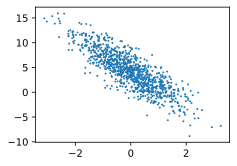

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [3]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [4]:
next(iter(data_iter))

[tensor([[-0.6088,  0.6395],
         [ 0.7448, -1.1354],
         [-1.0203, -1.2823],
         [ 1.0673,  1.3277],
         [ 0.4465,  0.9104],
         [ 0.2069,  0.0393],
         [ 0.3560, -0.7287],
         [-3.4381,  0.5895],
         [ 1.1008, -0.7829],
         [ 0.4344, -1.2561]]),
 tensor([[ 0.8120],
         [ 9.5471],
         [ 6.5236],
         [ 1.8184],
         [ 2.0155],
         [ 4.4746],
         [ 7.3971],
         [-4.6800],
         [ 9.0567],
         [ 9.3349]])]

In [5]:
from torch import nn

# nerual network
net = nn.Sequential(nn.Linear(2, 1))

In [6]:
# initialize
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [7]:
# loss function
loss = nn.MSELoss()

In [8]:
# SGD optimizer
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [9]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000212
epoch 2, loss 0.000103
epoch 3, loss 0.000103


w的估计误差： tensor([ 5.5790e-05, -8.9550e-04])
b的估计误差： tensor([-0.0006])
